#### Import of Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [21]:
df = pd.read_csv('datasets/abalone.csv')

# Sex: 1 for female and 2 for male, 3 for I
df["Sex"]=df["Sex"].replace("F",1)  
df["Sex"]=df["Sex"].replace("M",2)
df["Sex"]=df["Sex"].replace("I",3)

In [22]:
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4174 non-null   int64  
 1   Length          4174 non-null   float64
 2   Diameter        4174 non-null   float64
 3   Height          4174 non-null   float64
 4   Whole_weight    4174 non-null   float64
 5   Shucked_weight  4174 non-null   float64
 6   Viscera_weight  4174 non-null   float64
 7   Shell_weight    4174 non-null   float64
 8   Rings           4174 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.6 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

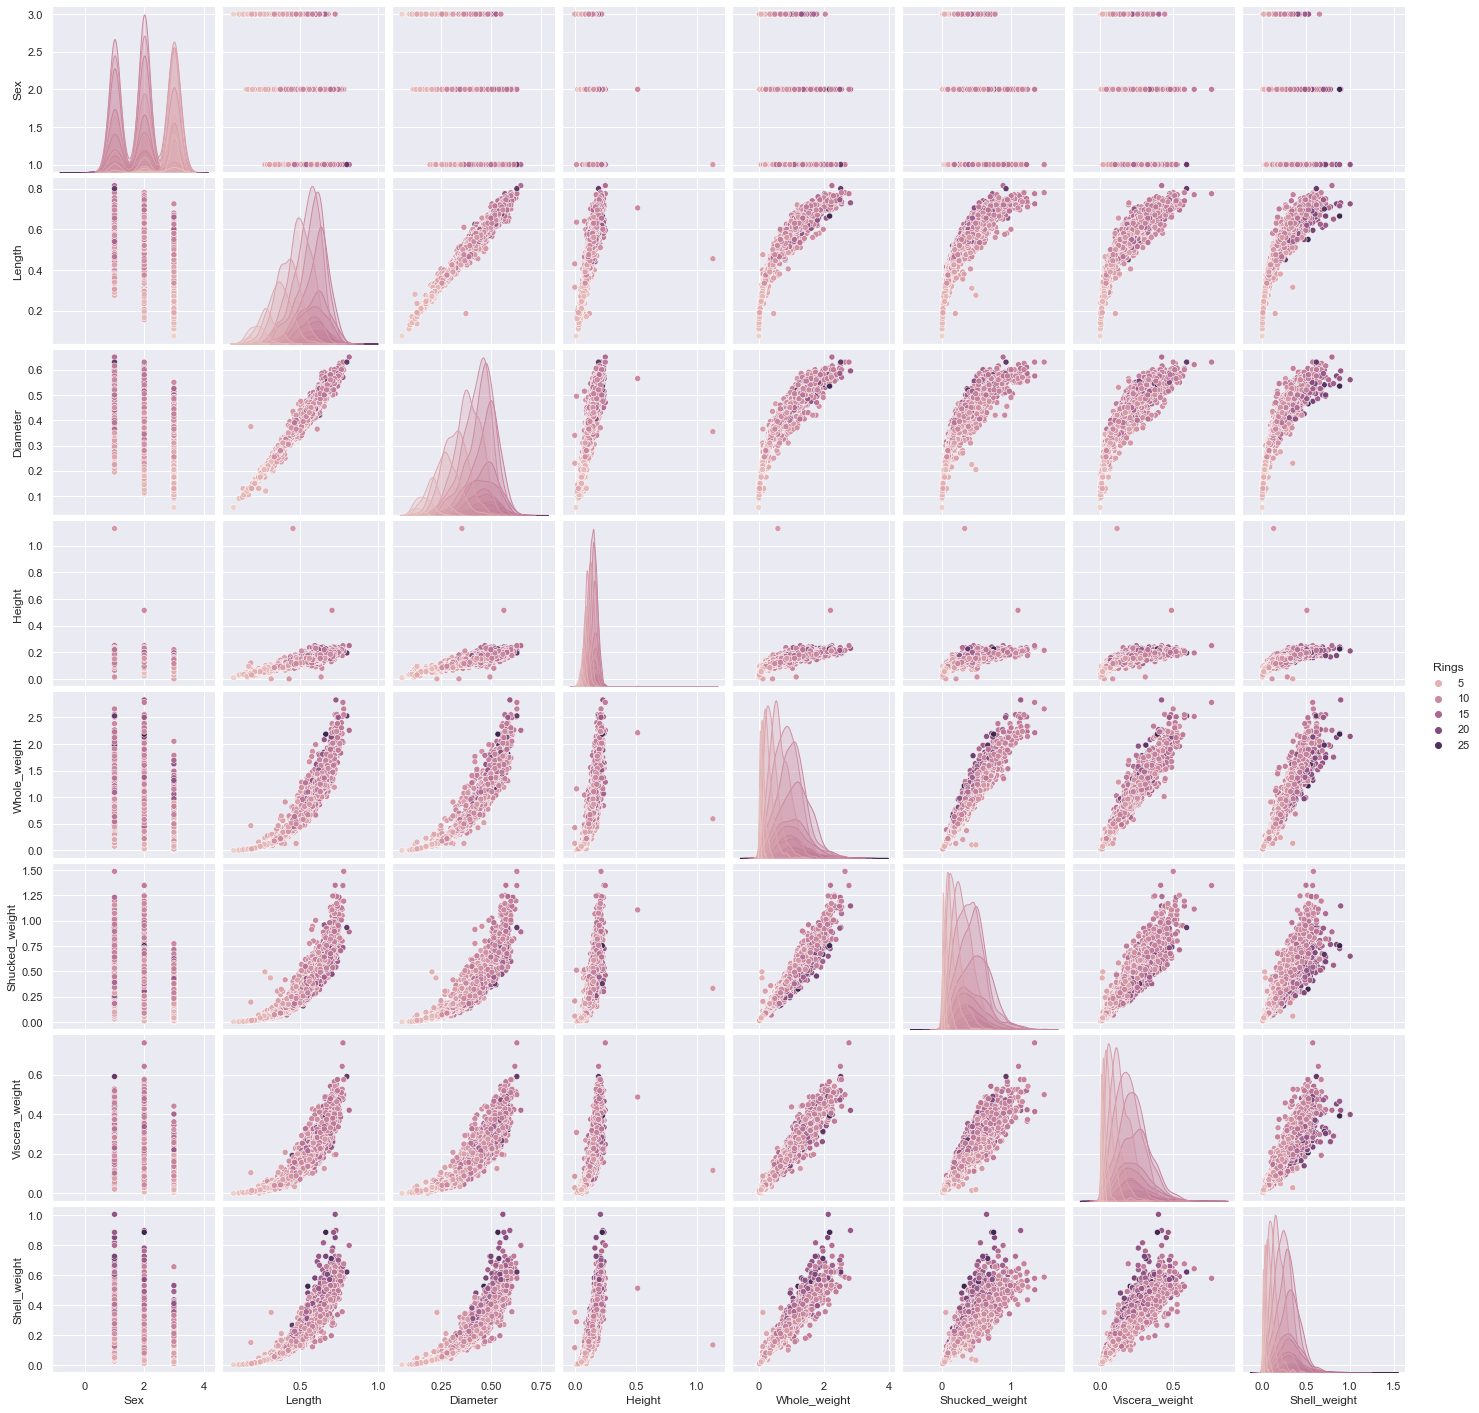

In [24]:
sns.pairplot(df, hue='Rings')
plt.show()

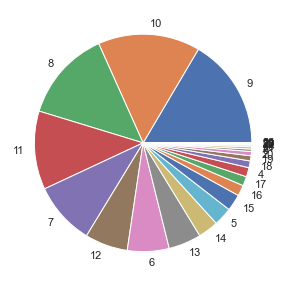

In [25]:
y =df['Rings']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [26]:
X = df.drop(columns=['Rings'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,4174.0,2.008146,0.796548,1.0000,1.000000,2.00000,3.000000,3.0000
Length,4174.0,0.524032,0.120033,0.0750,0.450000,0.54500,0.615000,0.8150
Diameter,4174.0,0.407919,0.099187,0.0550,0.350000,0.42500,0.480000,0.6500
Height,4174.0,0.139524,0.041818,0.0000,0.115000,0.14000,0.165000,1.1300
Whole_weight,4174.0,0.828771,0.490065,0.0020,0.442125,0.79975,1.153000,2.8255
Shucked_weight,4174.0,0.359361,0.221771,0.0010,0.186500,0.33600,0.501875,1.4880
Viscera_weight,4174.0,0.180607,0.109574,0.0005,0.093500,0.17100,0.252875,0.7600
Shell_weight,4174.0,0.238853,0.139143,0.0015,0.130000,0.23400,0.328875,1.0050


#### Standardize the Data

In [27]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,4174.0,-2.110860e-16,1.00012,-1.265795,-1.265795,-0.010227,1.245340,1.245340
Length,4174.0,-8.988178e-16,1.00012,-3.741360,-0.616840,0.174706,0.757950,2.424361
Diameter,4174.0,-4.630274e-16,1.00012,-3.558550,-0.584011,0.172228,0.726803,2.440944
Height,4174.0,-2.315137e-16,1.00012,-3.336841,-0.586522,0.011373,0.609269,23.688035
Whole_weight,4174.0,-1.361845e-16,1.00012,-1.687268,-0.789065,-0.059226,0.661683,4.074908
Shucked_weight,4174.0,-1.021384e-17,1.00012,-1.616101,-0.779552,-0.105351,0.642695,5.089825
Viscera_weight,4174.0,-1.838491e-16,1.00012,-1.643895,-0.795053,-0.087686,0.659614,5.288307
Shell_weight,4174.0,-1.753376e-16,1.00012,-1.706028,-0.782404,-0.034880,0.647055,5.506860


#### Observations and Variables

In [28]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

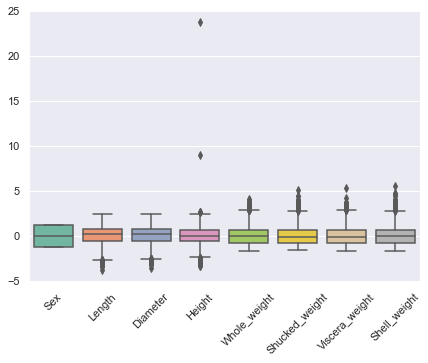

In [29]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

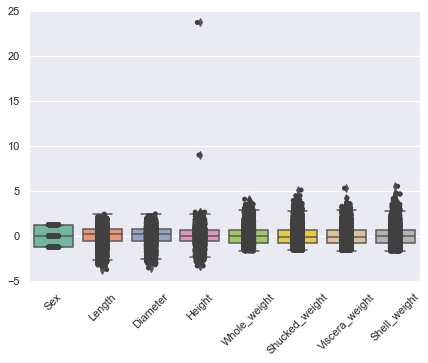

In [30]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

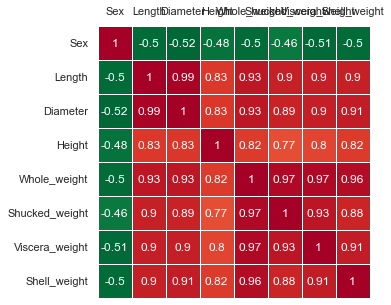

In [31]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [32]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [33]:
out['PC']

,PC1,PC2,PC3
0,-1.710060,-0.382137,-0.420670
1,-3.276170,-0.752804,-0.156589
2,-0.184654,-1.369098,0.146256
3,-1.468803,-0.367668,0.181903
4,-3.843384,0.413111,-0.236095
...,...,...,...
4169,1.640895,0.366109,-0.039506
4170,3.506968,-0.520657,0.633007
4171,-2.983587,0.619915,-0.353235
4172,-1.794086,0.856456,0.117963


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [97.53%] of the variance'}, xlabel='PC1 (83.2% expl.var)', ylabel='PC2 (8.76% expl.var)'>)

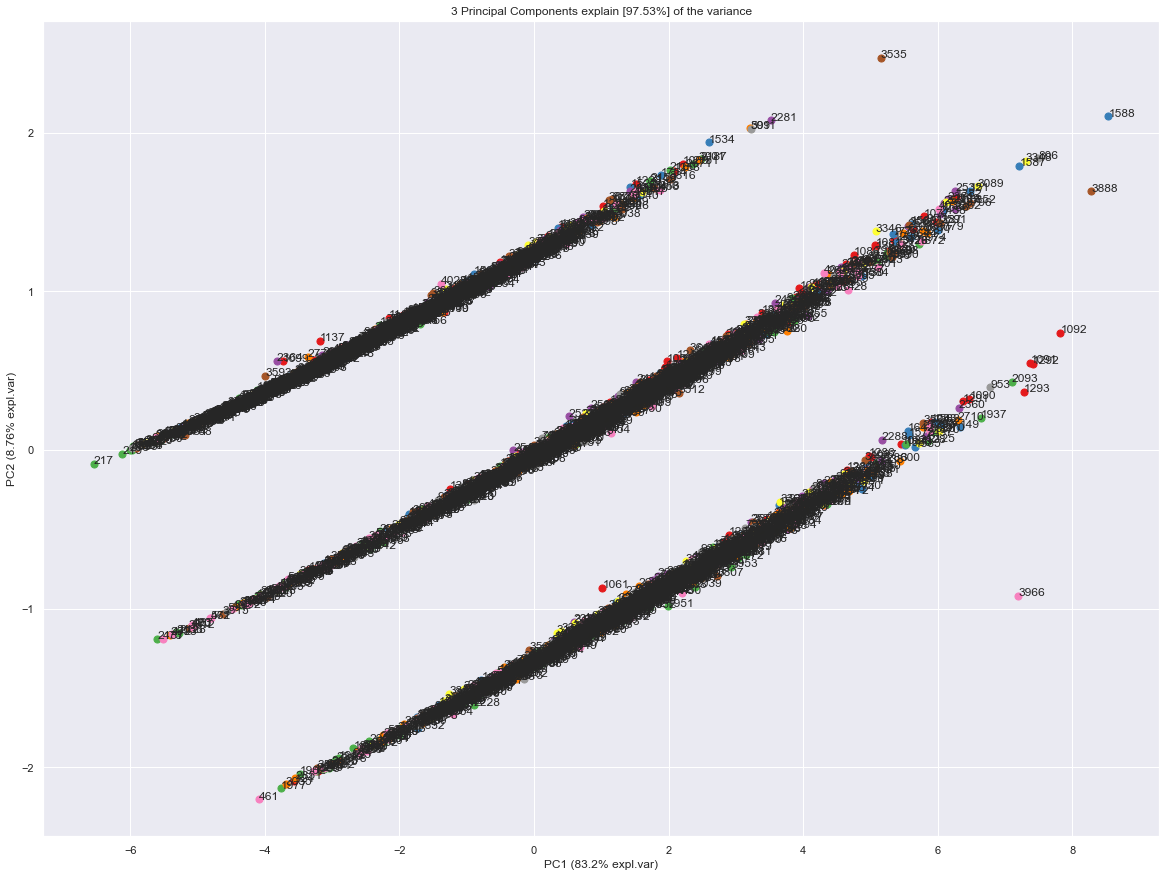

In [34]:
model.scatter(label=True, legend=False)

Eigenvectors

In [35]:
A = out['loadings'].T

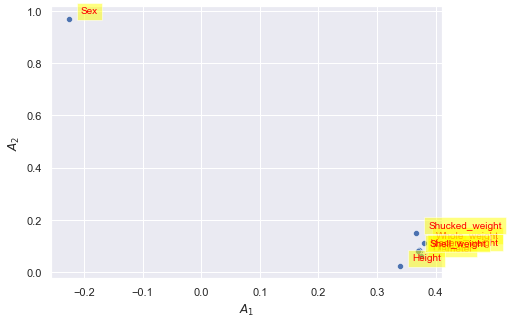

In [36]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

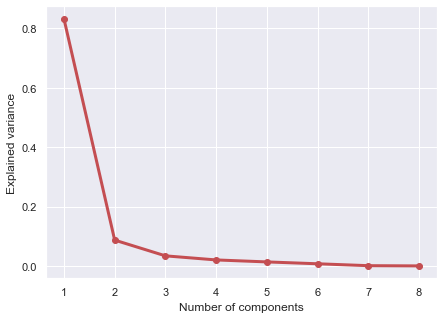

In [37]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

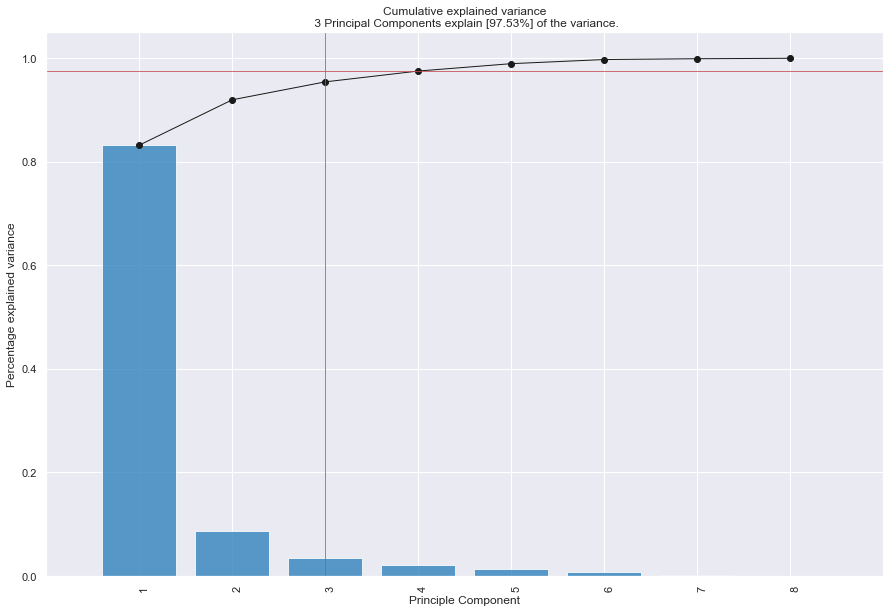

<Figure size 504x360 with 0 Axes>

In [38]:
model.plot();